Import Libraries and Read Data File

In [16]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # size of plots

In [112]:
# read data

df = pd.read_csv('movies.csv', engine = 'python')

In [113]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


Exploring Dataset and Cleaning

In [114]:
# check for missing values

for col in df:
    per_null = np.mean(df[col].isnull())
    print("{} - {}%".format(col,per_null))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [115]:
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [116]:
# dropping decimal values

df['budget'] = df['budget'].astype('int')
df['gross'] = df['gross'].astype('int')


In [117]:
#dropping incorrect years

df = df.drop(['year'], axis=1)

In [118]:
df['year_released'] = df['released'].str[:4].astype(str)  

In [119]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_released
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1987
6,25000000,Henson Associates (HA),UK,Jim Henson,Adventure,12729917,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000,SLM Production Group,USA,David Cronenberg,Drama,40456565,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [126]:
df.sort_values(by = ['gross'], inplace=True, ascending=False)

In [127]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_released
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012
4840,185000000,Warner Bros.,USA,Christopher Nolan,Action,534858444,The Dark Knight,PG-13,2008-07-18,152,9.0,Christian Bale,1839571,Jonathan Nolan,2008
6614,200000000,Lucasfilm,USA,Gareth Edwards,Action,532177324,Rogue One,PG-13,2016-12-16,133,7.9,Felicity Jones,365473,Chris Weitz,2016
6687,200000000,Pixar Animation Studios,USA,Andrew Stanton,Animation,486295561,Finding Dory,PG,2016-06-17,97,7.4,Ellen DeGeneres,173005,Andrew Stanton,2016
2870,115000000,Lucasfilm,USA,George Lucas,Action,474544677,Star Wars: Episode I - The Phantom Menace,PG,1999-05-19,136,6.5,Ewan McGregor,584809,George Lucas,1999
6398,250000000,Marvel Studios,USA,Joss Whedon,Action,459005868,Avengers: Age of Ultron,PG-13,2015-05-01,141,7.4,Robert Downey Jr.,537832,Joss Whedon,2015


Finding Correlations between Variables

Text(0, 0.5, 'Gross')

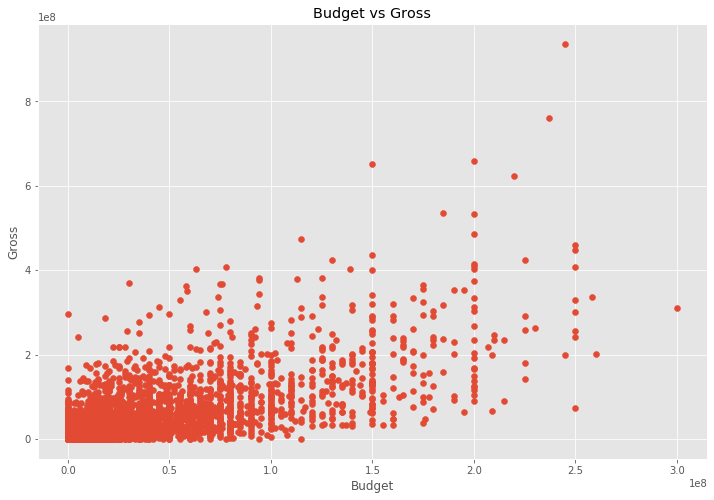

In [129]:
# Correlation of Budget and Gross collection

plt.scatter(x=df['budget'], y = df['gross'])
plt.title ('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

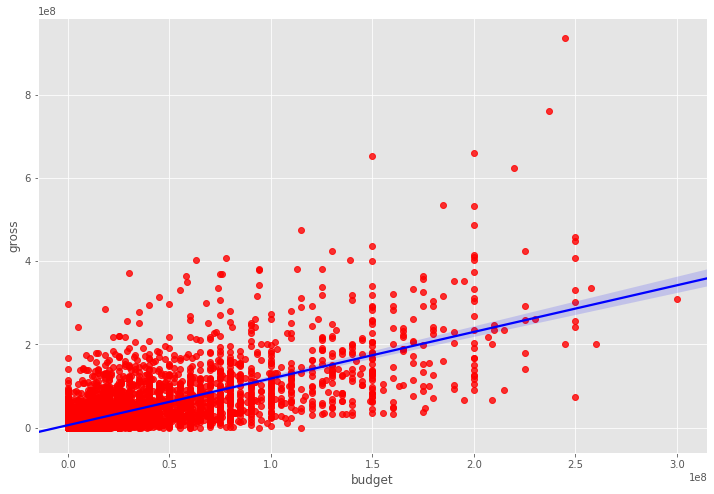

In [134]:
#linear regression plot

sns.regplot(x='budget', y='gross', data=df, 
            scatter_kws={"color":"red"}, line_kws={"color":"blue"}
           )

In [138]:
corr_matrix = df.corr(method = 'pearson')

# shows only for numbers

# corr method = pearson, kendall, spearson

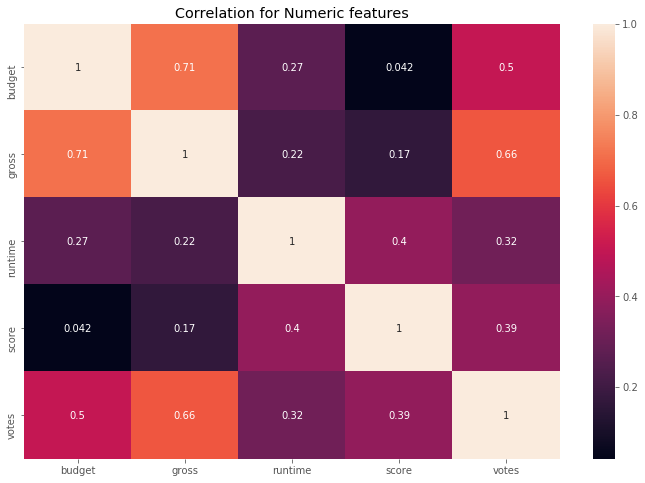

In [140]:
sns.heatmap(corr_matrix, annot=True)
plt.title ('Correlation for Numeric features')

plt.show()

In [150]:
# Changing string values to category (to find corr)

df_num = df

for col in df_num.columns:
    if (df_num[col].dtype == 'object'):
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col] = df_num[col].cat.codes
        
df_num
        

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year_released
6380,245000000,Lucasfilm,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,29
5061,237000000,Twentieth Century Fox Film Corporation,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,23
2420,200000000,Twentieth Century Fox Film Corporation,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,11
6391,150000000,Universal Pictures,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,29
5723,220000000,Marvel Studios,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,26
4840,185000000,Warner Bros.,54,440,0,534858444,5189,7,1696,152,9.0,408,1839571,2090,22
6614,200000000,Lucasfilm,54,835,0,532177324,4206,7,2363,133,7.9,739,365473,625,30
6687,200000000,Pixar Animation Studios,54,128,2,486295561,1836,6,2328,97,7.4,678,173005,201,30
2870,115000000,Lucasfilm,54,885,0,474544677,4675,6,1012,136,6.5,729,584809,1334,13
6398,250000000,Marvel Studios,54,1412,0,459005868,502,7,2239,141,7.4,2001,537832,2145,29


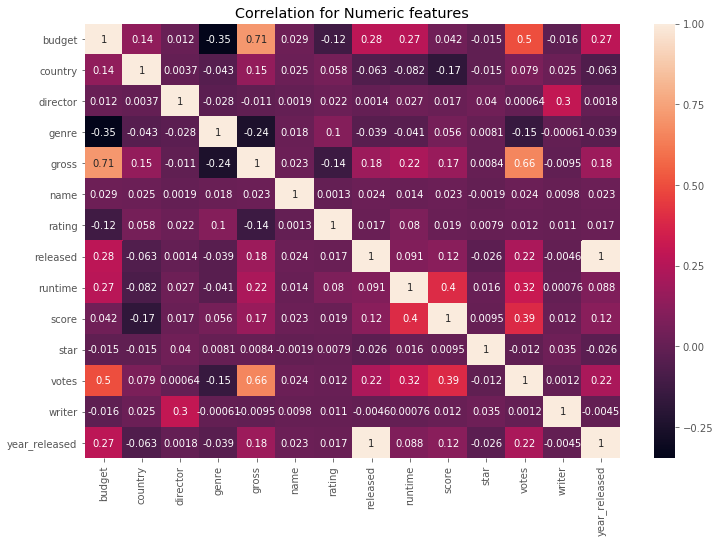

In [183]:
#visualizing correlations

corr_matrix = df_num.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title ('Correlation for Numeric features')

plt.show()


In [184]:
corr_pairs = corr_matrix.unstack()

In [185]:
corr_pairs

budget         budget           1.000000
               country          0.137635
               director         0.011602
               genre           -0.346794
               gross            0.712196
               name             0.028712
               rating          -0.119660
               released         0.276635
               runtime          0.268226
               score            0.042145
               star            -0.015061
               votes            0.503924
               writer          -0.015611
               year_released    0.274820
country        budget           0.137635
               country          1.000000
               director         0.003698
               genre           -0.042793
               gross            0.149988
               name             0.025020
               rating           0.057979
               released        -0.062609
               runtime         -0.081796
               score           -0.174414
               s

In [186]:
# see pairs that have only high coorelation

corr_high = corr_pairs[(corr_pairs) > 0.5]

In [187]:
corr_high.sort_values()

budget         votes            0.503924
votes          budget           0.503924
               gross            0.662457
gross          votes            0.662457
budget         gross            0.712196
gross          budget           0.712196
year_released  released         0.999389
released       year_released    0.999389
budget         budget           1.000000
writer         writer           1.000000
votes          votes            1.000000
star           star             1.000000
score          score            1.000000
rating         rating           1.000000
released       released         1.000000
name           name             1.000000
gross          gross            1.000000
genre          genre            1.000000
director       director         1.000000
country        country          1.000000
runtime        runtime          1.000000
year_released  year_released    1.000000
dtype: float64

In [188]:
corr_low = corr_pairs[(corr_pairs) < -0.1]

In [189]:
corr_low

budget   genre     -0.346794
         rating    -0.119660
country  score     -0.174414
genre    budget    -0.346794
         gross     -0.242676
         votes     -0.150519
gross    genre     -0.242676
         rating    -0.135538
rating   budget    -0.119660
         gross     -0.135538
score    country   -0.174414
votes    genre     -0.150519
dtype: float64

In [ ]:
# Hence we have found the variables that have the most correlation